In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [3]:
data = pd.read_csv('data/spotify_most_streamed_2024.zip', encoding='unicode_escape')

In [4]:
data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [5]:
data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [6]:
def to_snake_case(column_name):
    return(
        column_name.strip()
        .replace('.', '_')
        .replace(' ', '_')
        .lower()
    )

In [7]:
data.columns = [to_snake_case(col) for col in data.columns]

In [8]:
data.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

In [9]:
data.tidal_popularity.unique

<bound method Series.unique of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4595   NaN
4596   NaN
4597   NaN
4598   NaN
4599   NaN
Name: tidal_popularity, Length: 4600, dtype: float64>

In [10]:
data.drop('tidal_popularity', axis=1)

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,airplay_spins,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,6,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,412,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,204,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,"1,200",NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",0


### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [11]:
grouped_data_by_artists = data.groupby('artist').size().reset_index(name='songs_count')

In [12]:
grouped_data_by_artists.sort_values(by='songs_count', ascending=False).head(5)

,artist,songs_count
517,Drake,63
1690,Taylor Swift,63
183,Bad Bunny,60
915,KAROL G,32
1728,The Weeknd,31


In [13]:
clean_songs = data[data.explicit_track == 0]

In [14]:
clean_artists_count = clean_songs.groupby('artist').size().reset_index(name='clean_songs_count')

In [15]:
top_clean_artists = clean_artists_count.sort_values(by='clean_songs_count', ascending=False).head(5)

In [16]:
top_clean_artists

,artist,clean_songs_count
1305,Taylor Swift,50
171,Billie Eilish,25
139,Bad Bunny,18
715,KAROL G,18
967,Morgan Wallen,17


### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [17]:
artist_streams = data.groupby('artist')['spotify_streams'].sum().reset_index(name='total_streams')

In [18]:
artist_streams

,artist,total_streams
0,"""XY""",0
1,$OHO BANI,"54,065,563"
2,$uicideboy$,"44,027,794675,082,623189,588,27073,979,851204,..."
3,&ME,"34,601,626"
4,(G)I-DLE,"289,304,213286,016,224242,708,36858,909,647"
...,...,...
1994,ýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýý,"2,409,532"
1995,ýýýýýýýýýýýýýýý(ýýýýýýýýýýýýýýý),"548,408"
1996,ýýýýýýýýýýýýýýýýýý,"4,943,057"
1997,ýýýýýýýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýýýýýýýý,"456,034"


In [24]:
artist_streams.total_streams.replace(',', '', regex=True)

0                                                       0
1                                                54065563
2       4402779467508262318958827073979851204669341162...
3                                                34601626
4                     28930421328601622424270836858909647
                              ...                        
1994                                              2409532
1995                                               548408
1996                                              4943057
1997                                               456034
1998                                              3225791
Name: total_streams, Length: 1999, dtype: object

In [26]:
artist_streams['total_streams'] = artist_streams['total_streams'].str.replace(',', '', regex=True)

In [28]:
artist_streams['total_streams'] = pd.to_numeric(artist_streams['total_streams'], errors='coerce', downcast='float')

In [29]:
artist_streams.total_streams

0                NaN
1       5.406556e+07
2       4.402779e+76
3       3.460163e+07
4       2.893042e+34
            ...     
1994    2.409532e+06
1995    5.484080e+05
1996    4.943057e+06
1997    4.560340e+05
1998    3.225791e+06
Name: total_streams, Length: 1999, dtype: float64

In [33]:
most_streamed_artists = artist_streams.sort_values(by='total_streams', ascending=False)

In [35]:
most_streamed_artists.head(5)

,artist,total_streams
915,KAROL G,1.024382e+289
1728,The Weeknd,4.281469e+275
1763,Travis Scott,5.326053e+268
129,Ariana Grande,5.910684e+243
227,Billie Eilish,2.216362e+241


### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [42]:
data.release_date

0       4/26/2024
1        5/4/2024
2       3/19/2024
3       1/12/2023
4       5/31/2024
          ...    
4595     9/5/2017
4596    7/27/2018
4597    2/28/2020
4598    11/8/2016
4599    4/11/2017
Name: release_date, Length: 4600, dtype: object

In [43]:
data['release_year'] = pd.to_datetime(data['release_date']).dt.year

In [44]:
data.release_year

0       2024
1       2024
2       2024
3       2023
4       2024
        ... 
4595    2017
4596    2018
4597    2020
4598    2016
4599    2017
Name: release_year, Length: 4600, dtype: int32

In [49]:
songs_per_year = data.groupby('release_year').size().reset_index(name='songs_count')

In [50]:
songs_per_year

,release_year,songs_count
0,1987,1
1,1991,1
2,1994,1
3,1998,1
4,1999,1
5,2000,2
6,2001,1
7,2002,5
8,2003,3
9,2004,5


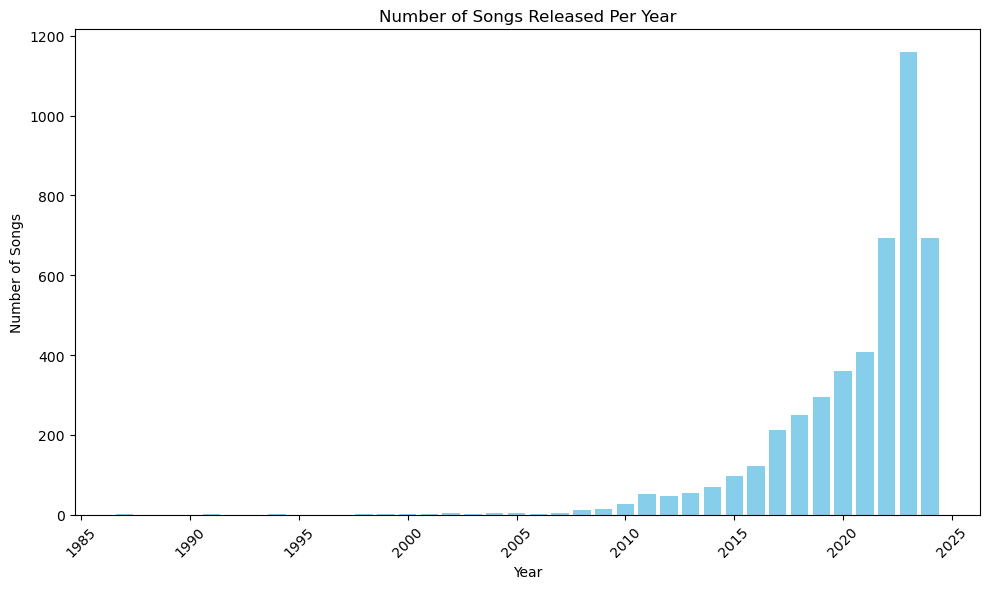

In [65]:
plt.figure(figsize=(10, 6))
plt.bar(songs_per_year['release_year'], songs_per_year['songs_count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs Released Per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.